In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [34]:
data = pd.read_excel("../julia_msp/data/assets_data_03.24.xlsx", sheet_name="Macro_Data", index_col="Date")
cpi_us = data["USACPIALLMINMEI"] * 4

<AxesSubplot:xlabel='Date'>

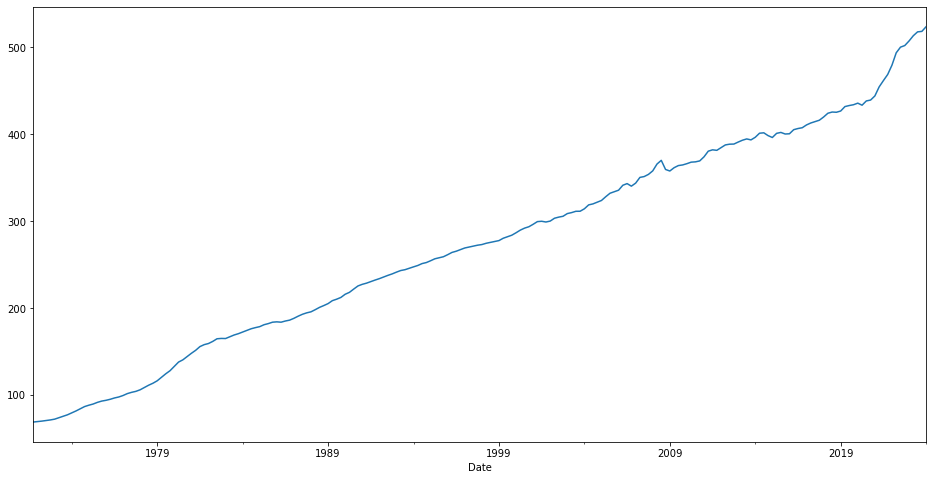

In [35]:
cpi_us.plot(figsize=(16,8))

In [46]:
cpi_cycle, cpi_trend = sm.tsa.filters.cffilter(cpi_us)

In [47]:
cpi_trend

Date
1971-10-01    68.123868
1972-01-01    67.163360
1972-04-01    66.681912
1972-07-01    66.439323
1972-10-01    65.946038
                ...    
2023-01-01    52.925755
2023-04-01    58.003582
2023-07-01    61.400837
2023-10-01    60.775043
2024-01-01    65.132936
Name: USACPIALLMINMEI_trend, Length: 210, dtype: float64

<AxesSubplot:xlabel='Date'>

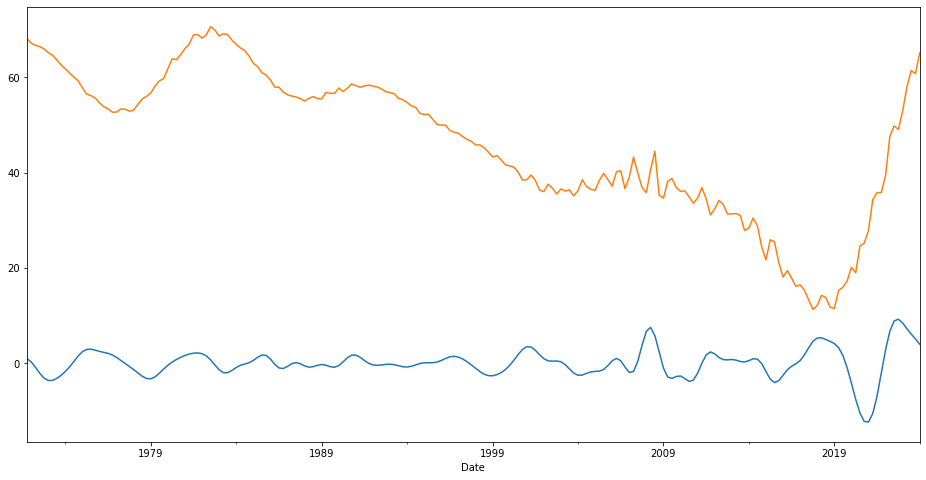

In [48]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
cpi_cycle.plot(ax= ax,)
cpi_trend.plot(ax=ax)

In [27]:
dta = sm.datasets.macrodata.load_pandas().data
index = pd.period_range('1959Q1', '2009Q3', freq='Q')
dta.set_index(index, inplace=True)

In [28]:
cycle, trend = sm.tsa.filters.hpfilter(dta.realgdp, 1600)
gdp_decomp = dta[['realgdp']]
gdp_decomp["cycle"] = cycle
gdp_decomp["trend"] = trend

C:\Users\matsz\AppData\Local\Temp\ipykernel_2060\4142961758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["cycle"] = cycle
C:\Users\matsz\AppData\Local\Temp\ipykernel_2060\4142961758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_decomp["trend"] = trend


In [31]:
cycle

1959Q1     39.511915
1959Q2     80.088532
1959Q3     48.875455
1959Q4     30.591933
1960Q1     64.882667
             ...    
2008Q3    102.018455
2008Q4   -107.269472
2009Q1   -349.047706
2009Q2   -397.557073
2009Q3   -333.115243
Freq: Q-DEC, Name: realgdp_cycle, Length: 203, dtype: float64

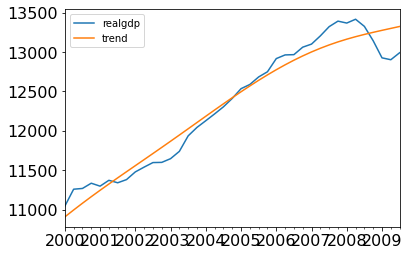

In [33]:
fig, ax = plt.subplots()
gdp_decomp[["realgdp", "trend"]]["2000-03-31":].plot(ax=ax, fontsize=16)
plt.show()